# Ornstein-Ulhenbeck

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

### Time Average
Singola traiettoria, di cui si fa la media e la varianza temporale per arrivare all'autocorrelazione

In [2]:
@njit
def ac_time_average(x, max_tau):
    T = len(x)
    mean = np.mean(x)
    var = np.var(x)

    ac = np.zeros(max_tau+1)

    for tau in taus:
        prod = (x[:T-tau] - mean) * (x[tau:] - mean) # Vettore con prodotti
        ac[tau] = np.mean(prod) / var

    return ac

In [3]:
T = 10**5
dt = 1.0 # Passso temporale
max_tau = 30 # Lag per autocorrelazione
taus = np.arange(0, max_tau+1)

x = np.zeros(T)
x[0] = 0.1 # Valore iniziale

In [4]:
mu = 0 # Valore medio
sigma = 1.0 # Intensità rumore

gamma = 0.1 # Forza di richiamo

for t in range(1, T):
    noise = np.random.normal(0, np.sqrt(dt))
    x[t] = x[t-1] - gamma*(x[t-1]-mu)*dt + sigma*noise

ac_time = ac_time_average(x, max_tau)

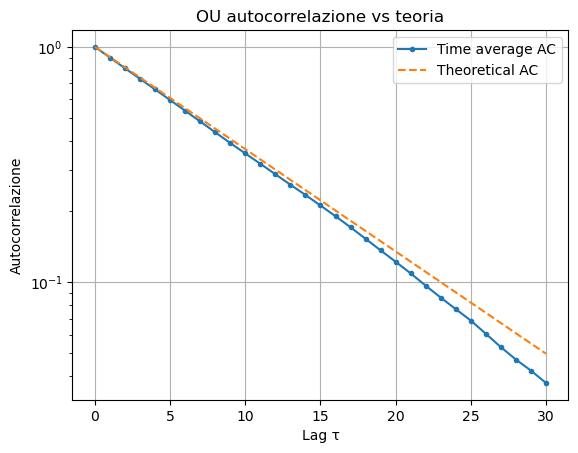

In [11]:
ac_theoretical = np.exp(-gamma * taus * dt)

plt.semilogy()
plt.plot(taus, ac_time, label="Time average AC", marker='o', markersize=3)
plt.plot(taus, ac_theoretical, label="Theoretical AC", linestyle="--")
plt.xlabel("Lag τ")
plt.ylabel("Autocorrelazione")
plt.title("OU autocorrelazione vs teoria")
plt.legend()
plt.grid(True)
plt.show()

X[1] += 3-52

### Ensemble Average
Insieme di N traiettorie, si valuta l'autocorrelazione tra t e t+tau di tutte le traiettorie contemporaneamente e poi si fa la media. A differenza del mixed si centrano tutte le traiettorie e poi si calcola la ac sommando sia su t che su i. E' un metodo meno dinamico ma più statistico

In [8]:
def ac_ensemble_average(X, max_tau):
    N, T = X.shape
    ac = np.zeros(max_tau+1)
    d_ac = np.zeros(max_tau+1)

    means = np.mean(X, axis=1, keepdims=True) # Media lungo ogni riga i (traiettoria)
    varsx = np.var(X, axis=1, keepdims=True) # Varianza lungo ogni riga i
    Xc = X-means # Centra ogni riga i una volta per tutti

    for tau in range(max_tau+1):
        numeratori = np.sum(Xc[:, :T-tau]*Xc[:,tau:], axis=1) # Somma di tutte le correlazioni t - t+tau fissato e traiettoria i variabile
        denominatori = (T-tau)*varsx.flatten() # Quel T-tau serve per poi con il numeratore fanno la media della corr fra t - t+tau per le traiettorie
        ac_tau = numeratori/denominatori # Ha shape N, è la ac per ogni traiettoria
        d_ac[tau] = np.std(ac_tau)
        ac[tau] = np.mean(ac_tau) # Media sulle ac di ogni traiettoria

    return ac, d_ac

In [9]:
T = 10**5
dt = 1.0
max_tau = 30
taus = np.arange(0, max_tau+1)
N = 100

X = np.zeros((N,T))
X[:,0] = 0.1

In [10]:
mu = 0.0
sigma = 1.0

gamma = 0.1

for i in range(N):
    for t in range(1, T):
        noise = np.random.normal(0, np.sqrt(dt))
        X[i,t] = X[i,t-1] - gamma*(X[i,t-1]-mu)*dt + sigma*noise

ac_ens, d_ac_ens = ac_ensemble_average(X, max_tau)

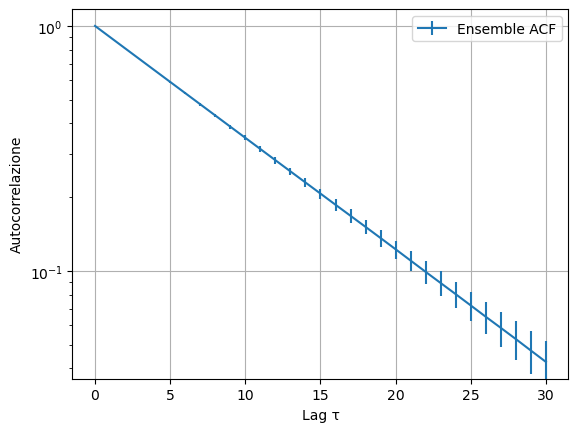

In [35]:
plt.semilogy()
plt.errorbar(taus, ac_ens, d_ac_ens, label="Ensemble ACF")
plt.xlabel("Lag τ")
plt.ylabel("Autocorrelazione")
plt.grid()
plt.legend()
plt.show()

### Mixed Average
Insieme di N traiettorie, si fa la media delle autocorrelazioni time-average per ogni singola traiettoria

In [36]:
def ac_mixed_average(X, max_tau):
    N,T = X.shape
    ac = np.zeros((N,max_tau+1)) # Matrice ac

    # Calcolo ac time-average per ogni traiettoria
    for i in range(N):
        mean = np.mean(X[i,:])
        var = np.var(X[i,:])
        
        for tau in taus:
            prod = (X[i,:T-tau]-mean)*(X[i,tau:]-mean)
            ac[i,tau] = np.mean(prod)/var

    ac_mix = np.mean(ac, axis=0)
    d_ac_mix = np.std(ac, axis=0)

    return ac_mix, d_ac_mix

In [37]:
T = 10**5
dt = 1.0
max_tau = 30
taus = np.arange(0, max_tau+1)
N = 100

X = np.zeros((N,T))
X[:,0] = 0.1

In [38]:
mu = 0.0
sigma = 1.0

gamma = 0.1

for i in range(N):
    for t in range(1,T):
        noise = np.random.normal(0, np.sqrt(dt))
        X[i,t] = X[i,t-1] - gamma*(X[i,t-1]-mu)*dt + sigma*noise

ac_mix, d_ac_mix = ac_mixed_average(X, max_tau)

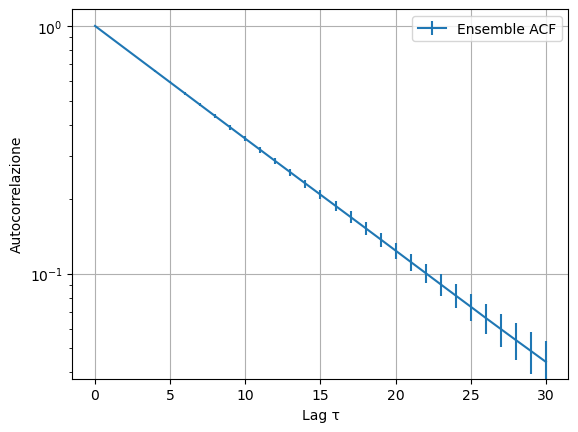

In [39]:
plt.semilogy()
plt.errorbar(taus, ac_mix, d_ac_mix, label="Ensemble ACF")
plt.xlabel("Lag τ")
plt.ylabel("Autocorrelazione")
plt.grid()
plt.legend()
plt.show()